In [15]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize'] = 15, 6

In [20]:
data = pd.read_csv('data/la-haute-borne-data-2017-2020.csv',sep=';')
data['Date_time'] = pd.to_datetime(data['Date_time'], utc=True)
data = data.drop('Va1_avg', 1)
data = data.drop('Va2_avg', 1)
data = data.drop('Pas_avg', 1)

<ipython-input-20-2b170438e42f>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('Va1_avg', 1)
<ipython-input-20-2b170438e42f>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('Va2_avg', 1)
<ipython-input-20-2b170438e42f>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('Pas_avg', 1)


In [25]:
a["Date_time"] = data["Date_time"].copy()

In [47]:
a["Date_time"] = pd.to_datetime(a['Date_time'], utc=True)

import datetime as dt
a["date"] = pd.to_datetime(a['Date_time']).apply(lambda x: x.date())
a['year'] = a['Date_time'].dt.year
a['month'] = a['Date_time'].dt.month
a['day'] = a['Date_time'].dt.day

In [48]:
a['day'] = a["day"].values

In [52]:
selected_columns = data[["P_avg","Ba_avg","Rt_avg","Yt_avg","Ws_avg","Ot_avg"]]
df = selected_columns.copy()
df.dropna(axis = 0, how ='any', inplace=True)
df["day"] = a["day"].copy()
df = df[df['P_avg'].notna()]
df = df[df['Ba_avg'].notna()]
df = df[df['Rt_avg'].notna()]
df = df[df['Yt_avg'].notna()]
df = df[df['Ws_avg'].notna()]
df = df[df['Ot_avg'].notna()]
# x = df[["Ba_avg","Rt_avg","Yt_avg","Ws_avg","Ot_avg"]]
x = df[["Ba_avg","day","Rt_avg","Yt_avg","Ws_avg","Ot_avg"]]
y = df['P_avg']

In [53]:
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

from sklearn import linear_model
LinR = linear_model.LinearRegression()
# fitting the training data
model = LinR.fit(x_train.values,y_train.values)

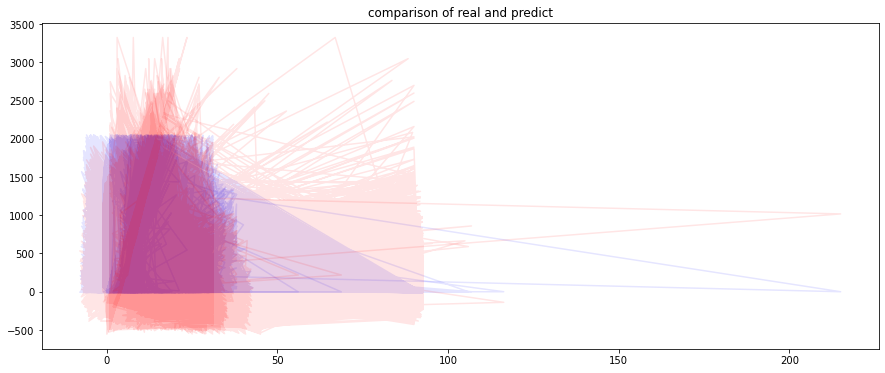

In [54]:
plt.plot(x_test.values, y_test.values, color = 'blue', alpha=0.1)
plt.plot(x_test.values, LinR.predict(x_test.values), color = 'red', alpha=0.1)
plt.title('comparison of real and predict')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [7]:
x_test

,Ba_avg,Rt_avg,Yt_avg,Ws_avg,Ot_avg
65305,0.07,36.16,32.530000,3.48,30.18
205840,44.99,12.00,14.600000,3.21,4.08
21489,-1.00,26.00,23.420000,8.49,17.42
91398,45.00,25.00,34.640000,2.99,19.50
44971,45.00,25.00,34.780000,2.98,19.29
...,...,...,...,...,...
44087,44.99,29.00,35.600000,1.73,25.13
170911,-0.95,13.00,16.870000,9.37,2.14
130577,-0.99,19.00,20.280001,6.63,9.25
1527,-0.24,22.00,32.260000,3.61,15.69


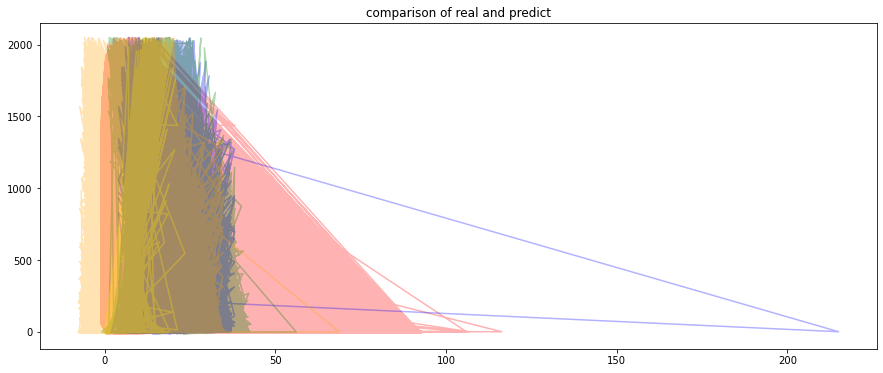

In [8]:
plt.plot(x_test["Ba_avg"].values, y_test.values, color = 'red', alpha=0.3)
plt.plot(x_test["Rt_avg"].values, y_test.values, color = 'blue', alpha=0.3)
plt.plot(x_test["Yt_avg"].values, y_test.values, color = 'green', alpha=0.3)
plt.plot(x_test["Ws_avg"].values, y_test.values, color = 'yellow', alpha=0.3)
plt.plot(x_test["Ot_avg"].values, y_test.values, color = 'orange', alpha=0.3)
# plt.plot(y_test.values, y_test.values, color = 'black', alpha=0.3)
plt.title('comparison of real and predict')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [9]:
a = df.sort_values(by=["Ws_avg"], ascending=False) # Wind speed
b = df.sort_values(by=["Ot_avg"], ascending=False) # temperature
c = df.sort_values(by=["Yt_avg"], ascending=False) # nacelle temperature
d = df.sort_values(by=["Rt_avg"], ascending=False) # hub temperature
e = df.sort_values(by=["Ba_avg"], ascending=False) # pitch angle

In [10]:
e

,P_avg,Ba_avg,Rt_avg,Yt_avg,Ws_avg,Ot_avg
196885,0.00,132.48,24.98,36.71,2.12,23.63
175114,0.00,116.29,24.77,29.03,1.28,21.98
199986,0.00,114.93,22.55,24.47,2.68,14.69
1315,0.00,111.78,28.00,30.00,6.17,22.00
200879,0.00,111.43,21.77,27.83,3.58,16.54
...,...,...,...,...,...,...
215726,899.03,-1.04,15.00,24.18,7.99,6.43
55902,1025.72,-1.04,15.00,24.63,8.44,6.48
213942,876.24,-1.04,12.11,21.54,7.64,1.20
213948,1051.76,-1.05,12.02,21.71,8.45,1.22


In [55]:
print('Coefficients:', model.coef_)
y_pred = abs(LinR.predict(x_test.values)) 
print("MAE: {}".format(np.abs(y_test-y_pred).mean()))
print("RMSE: {}".format(np.sqrt(((y_test-y_pred)**2).mean())))
from sklearn.metrics import r2_score
r2 = r2_score(y_test.values, y_pred)
print("r2: {}".format(r2))

Coefficients: [  1.70713496  -0.23422378   4.05906086  -9.81441995 154.51910725
  -0.95880958]
MAE: 134.82846900702336
RMSE: 190.17945749525614
r2: 0.8305710695512373


In [57]:
import shap

array([[-2.74722402e+01, -1.67235781e+00,  6.88964694e+01,
        -8.62167350e+01, -3.01265903e+02, -1.75163005e+01],
       [ 4.92122625e+01, -7.35462676e-01, -2.91704409e+01,
         8.97558146e+01, -3.42986062e+02,  7.50862961e+00],
       [-2.92988746e+01, -2.60925294e+00,  2.76564111e+01,
         3.19263070e+00,  4.72874824e+02, -5.28189024e+00],
       ...,
       [-2.92818032e+01,  2.07522271e+00, -7.57014890e-01,
         3.40098995e+01,  1.85469300e+02,  2.55158406e+00],
       [-2.80014520e+01,  2.01432453e-01,  1.14201677e+01,
        -8.35668416e+01, -2.81178419e+02, -3.62314966e+00],
       [-2.87696627e+01,  1.60677515e+00,  3.98335937e+01,
        -1.45714694e+01, -1.51382369e+02, -9.37600717e+00]])

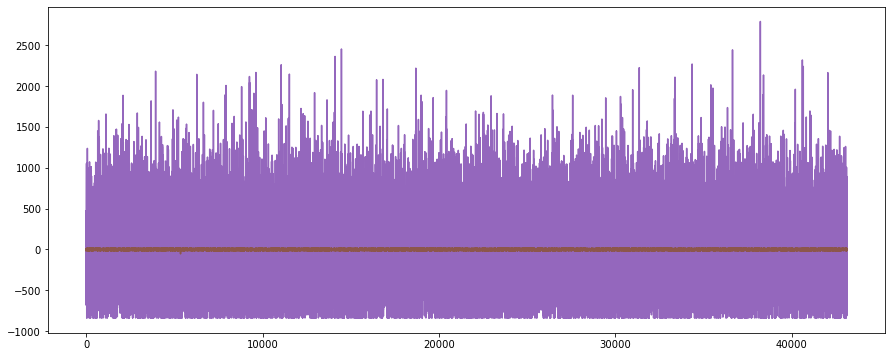

In [80]:
# compute the SHAP values for the linear model
explainer = shap.LinearExplainer(LinR, x_test)
shap_values = explainer.shap_values(x_test)

plt.plot(shap_values)
shap_values